# The EDA phase:
**To explore the data and visually review it, and to demonstrate the importance of removing some of it when it is not needed for generating reports from the radiographic image, it is necessary to perform this process to increase understanding of the data used within the project workflow.** 


In [1]:
import os

# المسار الذي زودتني به
folder_path = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized'

# جلب قائمة بأسماء الملفات
files = os.listdir(folder_path)

# طباعة أول 5 ملفات فقط للتجربة
print(f"العدد الكلي للصور الشعاعية : {len(files)}")
print("أمثلة من الملفات:")
print(files[:5])

العدد الكلي للصور الشعاعية : 7470
أمثلة من الملفات:
['349_IM-1697-2001.dcm.png', '607_IM-2196-1001.dcm.png', '2832_IM-1249-2001.dcm.png', '699_IM-2263-2001.dcm.png', '1931_IM-0602-2001.dcm.png']


In [2]:
from PIL import Image

# تحديد المسار الكامل لأول صورة في القائمة
sample_image_path = os.path.join(folder_path, files[0])

# فتح الصورة ومعرفة أبعادها
with Image.open(sample_image_path) as img:
    width, height = img.size
    print(f"اname of img: {files[0]}")
    print(f"the resolution of iamges is {width}*{height}")

اname of img: 349_IM-1697-2001.dcm.png
the resolution of iamges is 2048*2496


In [3]:
import pandas as pd

# قم بتغيير المسار للمسار الصحيح لملف الـ CSV لديك
csv_path = '/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv'

# قراءة الملف
df = pd.read_csv(csv_path)

#  عرض أسماء الأعمدة كقائمة في الملف الاول (indiana_projections.csv table)
print("The columns of indiana_projections.csv table are :")
print(df.columns.tolist())

The columns of indiana_projections.csv table are :
['uid', 'filename', 'projection']


- **uid**: رقم فريد يربط كل صف بالصورة والتقرير المقابلين له.
- **filename**: اسم ملف الصورة كما هو مخزن في النظام.
- **projection**: زاوية التصوير (مثل PA أو AP أو Lateral).


In [4]:
import pandas as pd

# قم بتغيير المسار للمسار الصحيح لملف الـ CSV لديك
csv_path = '/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv'

# قراءة الملف
df = pd.read_csv(csv_path)

#  عرض أسماء الأعمدة كقائمة في الملف الاول (indiana_reports.csv table)
print("The columns of indiana_reports.csv table are :")

print(df.columns.tolist())

The columns of indiana_reports.csv table are :
['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison', 'findings', 'impression']


- **uid**: رقم فريد يربط كل تقرير بالصورة المقابلة له.
- **MeSH**: وسوم طبية قياسية تصف موضوع الحالة (Medical Subject Headings).
- **Problems**: قائمة بالمشكلات أو التشخيصات المذكورة في التقرير.
- **image**: اسم ملف صورة الأشعة المرتبط بالتقرير.
- **indication**: سبب طلب صورة الأشعة أو الشك السريري.
- **comparison**: مقارنة مع صور أو تقارير سابقة إن وُجدت.
- **findings**: الملاحظات التفصيلية التي يراها الطبيب في الصورة.
- **impression**: الخلاصة التشخيصية أو التفسير النهائي للطبيب.


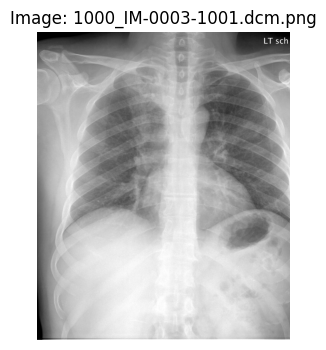

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ضع المسار الكامل للصورة هنا
image_path = '/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1000_IM-0003-1001.dcm.png'

# قراءة الصورة
img = mpimg.imread(image_path)

# عرض الصورة
plt.figure(figsize=(4, 4)) # تحديد حجم العرض
plt.imshow(img, cmap='gray') # استخدم cmap='gray' إذا كانت الصورة أشعة سينية (أسود وأبيض)
plt.title(f"Image: {image_path.split('/')[-1]}") # عرض اسم الملف كعنوان
plt.axis('off') # لإخفاء أرقام المحاور (الطول والعرض)
plt.show()

In [6]:
projections = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_projections.csv")
row = projections[projections["filename"] == "1000_IM-0003-1001.dcm.png"]
print(row)


       uid                   filename projection
1871  1000  1000_IM-0003-1001.dcm.png    Frontal


In [7]:
import pandas as pd

# قراءة البيانات
reports = pd.read_csv("/kaggle/input/chest-xrays-indiana-university/indiana_reports.csv")

# إعداد Pandas لعرض النص كاملاً دون تقطيع
pd.set_option('display.max_colwidth', None)

row = reports[reports["uid"] == 1]
display(row)

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.


In [8]:
from IPython.display import display

uid_value = 1

print("📌 من جدول projections:")
display(projections[projections["uid"] == uid_value])

print("📌 من جدول reports:")
display(reports[reports["uid"] == uid_value])


📌 من جدول projections:


,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral


📌 من جدول reports:


,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.


In [9]:
import pandas as pd
import os

# Base dataset directory
BASE = "/kaggle/input/chest-xrays-indiana-university"

# Image directory
IMG_DIR = f"{BASE}/images/images_normalized"
# Load CSV files
df_proj = pd.read_csv(f"{BASE}/indiana_projections.csv")
df_rep  = pd.read_csv(f"{BASE}/indiana_reports.csv")
# Merge projections with reports using uid
df = df_proj.merge(df_rep, on="uid", how="inner")

# Add full image path
df["image_path"] = df["filename"].apply(lambda x: os.path.join(IMG_DIR, x))
# Keep only rows where image exists
df = df[df["image_path"].apply(os.path.exists)]

# Combine findings + impression into one report text
df["report"] = (
    df["findings"].fillna("") + " " +
    df["impression"].fillna("")
).str.strip()


def clean_text(t):
    if not isinstance(t, str):
        return ""
    t = t.replace("\n", " ").replace("\r", " ")
    t = " ".join(t.split())  # remove extra spaces
    return t

df["report"] = df["report"].apply(clean_text)

print("Total paired samples:", len(df))
df.head(2)



Total paired samples: 7466


,uid,filename,projection,MeSH,Problems,image,indication,comparison,findings,impression,image_path,report
0,1,1_IM-0001-4001.dcm.png,Frontal,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.
1,1,1_IM-0001-3001.dcm.png,Lateral,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.,Normal chest x-XXXX.,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.


In [10]:
# حفظ الجدول كملف CSV
df.to_csv('my_processed_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


In [11]:
for col in df.columns:
    print("unique values of columns in df")
    print("="*60)
    print(f"📌 Column: {col}")
    print(df[col].unique())
    print("\n")


unique values of columns in df
📌 Column: uid
[   1    2    3 ... 3997 3998 3999]


unique values of columns in df
📌 Column: filename
['1_IM-0001-4001.dcm.png' '1_IM-0001-3001.dcm.png'
 '2_IM-0652-1001.dcm.png' ... '3998_IM-2048-1002.dcm.png'
 '3999_IM-2049-1001.dcm.png' '3999_IM-2049-2001.dcm.png']


unique values of columns in df
📌 Column: projection
['Frontal' 'Lateral']


unique values of columns in df
📌 Column: MeSH
['normal' 'Cardiomegaly/borderline;Pulmonary Artery/enlarged'
 'Pulmonary Disease, Chronic Obstructive;Bullous Emphysema;Pulmonary Fibrosis/interstitial;Cicatrix/lung/upper lobe/left;Opacity/lung/apex/left/irregular;Opacity/lung/upper lobe/right/streaky;Opacity/pulmonary alveoli;Opacity/lung/bilateral/interstitial/diffuse'
 ... 'Cardiomegaly/mild;Pulmonary Congestion;Heart Failure/mild'
 'Lung/hyperdistention/mild;Diaphragm/bilateral/flattened;Cicatrix/lung/middle lobe/right/mild;Pulmonary Atelectasis/middle lobe/right/mild;Pulmonary Emphysema'
 'Opacity/lung/upper lobe

In [12]:
for col in df.columns:
    print("unique values of columns in df With its repetition  ")
    print("="*60)
    print(f"📌 Column: {col}")
    print(df[col].value_counts())
    print("\n")


unique values of columns in df With its repetition  
📌 Column: uid
uid
1303    5
3566    4
846     4
1525    4
2243    4
       ..
3147    1
3151    1
3160    1
3127    1
3097    1
Name: count, Length: 3851, dtype: int64


unique values of columns in df With its repetition  
📌 Column: filename
filename
3999_IM-2049-2001.dcm.png    1
1_IM-0001-4001.dcm.png       1
1_IM-0001-3001.dcm.png       1
2_IM-0652-1001.dcm.png       1
2_IM-0652-2001.dcm.png       1
                            ..
7_IM-2263-2001.dcm.png       1
8_IM-2333-1001.dcm.png       1
8_IM-2333-2001.dcm.png       1
9_IM-2407-1001.dcm.png       1
9_IM-2407-2001.dcm.png       1
Name: count, Length: 7466, dtype: int64


unique values of columns in df With its repetition  
📌 Column: projection
projection
Frontal    3818
Lateral    3648
Name: count, dtype: int64


unique values of columns in df With its repetition  
📌 Column: MeSH
MeSH
normal                                                                                         

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. حذف الأعمدة غير المهمة
cols_to_drop = [
    "uid",
    "filename",
    "image",
    "comparison",
    "findings",
    "impression"
]

df_clean = df.drop(columns=cols_to_drop)



تم حذف هذه الأعمدة لأنها لا تُستخدم كمدخلات مباشرة للنموذج ولا تساهم في عملية التوليد النصي.  
 **uid** و **filename** و **image** هي معرفات وبيانات تنظيمية لا تحمل محتوى دلاليًا يفيد النموذج.  
أما أعمدة **comparison** و **findings** و **impression** فهي أجزاء من التقرير النهائي نفسه، وإبقاؤها قد يؤدي إلى تسريب معلومات الهدف (data leakage) أثناء التدريب، لذلك يتم الاعتماد فقط على الحقول النصية الأساسية التي نريد من النموذج تعلمها وتوليدها لاحقًا.


In [14]:
# حفظ الجدول كملف CSV
df_clean.to_csv('my_important_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


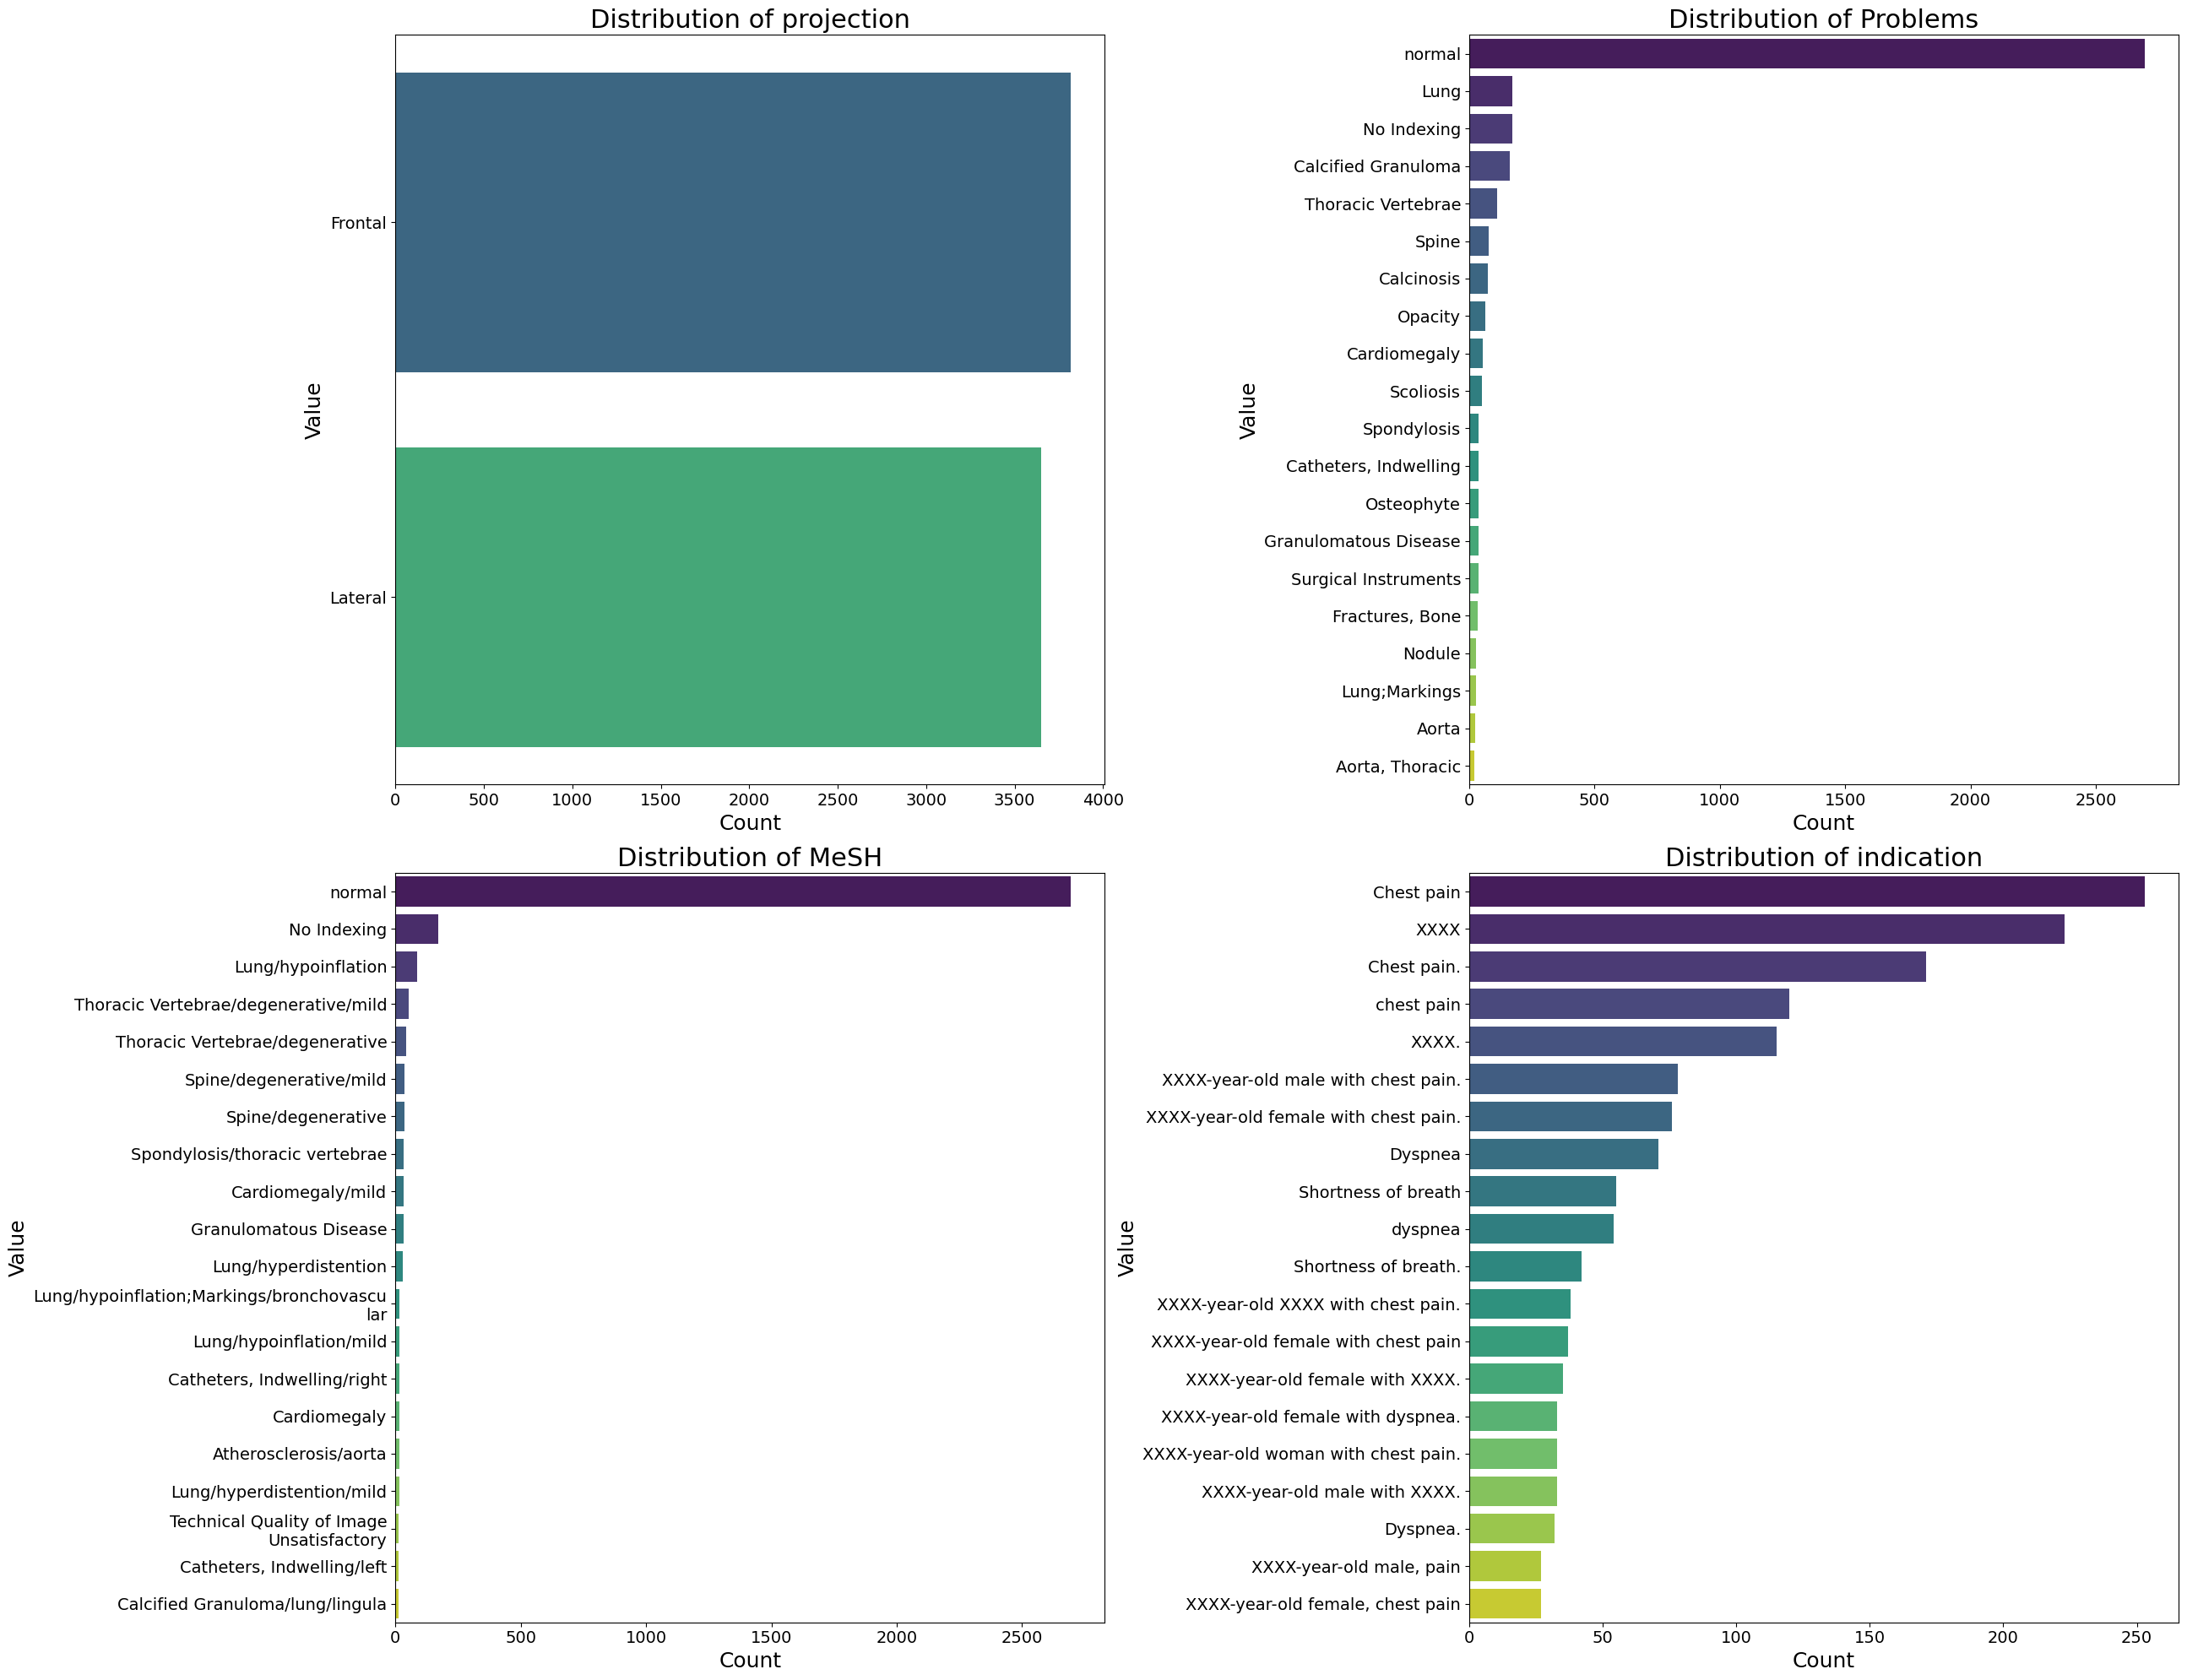

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# الأعمدة الوصفية المهمة
cols_to_plot = ["projection", "Problems", "MeSH", "indication"]

# دالة لتغليف النصوص الطويلة
def wrap_labels(labels, width=40):
    return ['\n'.join(textwrap.wrap(str(l), width)) for l in labels]

plt.figure(figsize=(26, 20))  # حجم ضخم وواضح

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)

    vc = df[col].value_counts().head(20)

    labels = wrap_labels(vc.index)

    sns.barplot(
        x=vc.values,
        y=labels,
        hue=labels,          # الحل الرسمي لتجنب التحذير
        palette="viridis",
        legend=False         # إخفاء الأسطورة لأنها غير ضرورية
    )

    plt.title(f"Distribution of {col}", fontsize=22)
    plt.xlabel("Count", fontsize=18)
    plt.ylabel("Value", fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [16]:
df_for_model = df[["image_path", "report", "projection"]].copy()
# حفظ الجدول كملف CSV
df_for_model.to_csv('my_model_data.csv', index=False)

print("تم حفظ الملف بنجاح في مجلد المخرجات!")

تم حفظ الملف بنجاح في مجلد المخرجات!


In [17]:
df_for_model.head(2).style.hide(axis='index')

image_path,report,projection
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Frontal
/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Lateral


In [18]:
# إظهار تكرار كل نص في عمود التقارير
counts = df_for_model["report"].value_counts()
print(counts)

report
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear. No acute disease.                                                                                                                                                                                                                                                                                                                                                        96
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal. No active disease.                                                                                                                                                                                                                                                                                                                     95
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, 

In [19]:
# لنفترض أن اسم العمود هو "report"
print(df_for_model["report"].dtype)
print(df_for_model["projection"].dtype)
print(df_for_model["image_path"].dtype)

object
object
object


In [20]:
import pandas as pd

df = pd.read_csv("/kaggle/working/my_model_data.csv")
df.head()   # عرض أول 5 صفوف


,image_path,report,projection
0,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-4001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Frontal
1,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/1_IM-0001-3001.dcm.png,The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax. Normal chest x-XXXX.,Lateral
2,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2_IM-0652-1001.dcm.png,Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. No acute pulmonary findings.,Frontal
3,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/2_IM-0652-2001.dcm.png,Borderline cardiomegaly. Midline sternotomy XXXX. Enlarged pulmonary arteries. Clear lungs. Inferior XXXX XXXX XXXX. No acute pulmonary findings.,Lateral
4,/kaggle/input/chest-xrays-indiana-university/images/images_normalized/3_IM-1384-1001.dcm.png,"No displaced rib fractures, pneumothorax, or pleural effusion identified. Well-expanded and clear lungs. Mediastinal contour within normal limits. No acute cardiopulmonary abnormality identified.",Frontal


In [21]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small", legacy=False)

df_for_model["token_count"] = df_for_model["report"].apply(
    lambda x: len(tokenizer.encode(str(x)))
)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [22]:
df_for_model["token_count"].describe()


count    7466.000000
mean       72.715510
std        38.829036
min         1.000000
25%        47.000000
50%        64.000000
75%        89.000000
max       392.000000
Name: token_count, dtype: float64

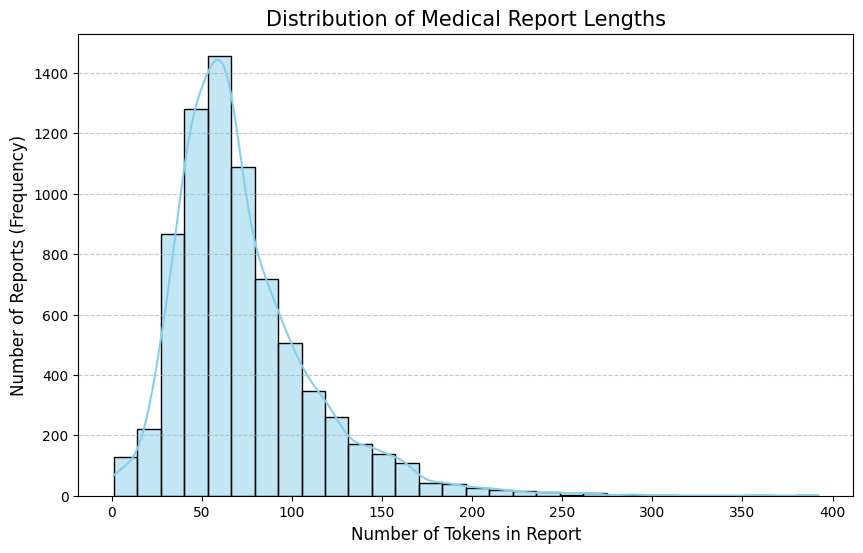

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# ضبط حجم الرسم
plt.figure(figsize=(10, 6))

# رسم المدرج التكراري
sns.histplot(df_for_model["token_count"], bins=30, kde=True, color='skyblue')

# إضافة العناوين
plt.title('Distribution of Medical Report Lengths', fontsize=15)
plt.xlabel('Number of Tokens in Report', fontsize=12)
plt.ylabel('Number of Reports (Frequency)', fontsize=12)


# إضافة شبكة خلفية لتسهيل القراءة
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# preprocessing Dataset
**Performing pre-training operations on all data regardless of their intended use, whether for feature extraction from images from the encoder's side or processing text reports that the decoder will rely on to generate the medical report.**

In [24]:
image_paths = df["image_path"].tolist()
reports = df["report"].tolist()
projections = df["projection"].tolist()


In [25]:
!pip install timm


In [26]:
import os
import timm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

#  معالجة البيانات وتحسين الصور (Data Preprocessing & Augmentation)

يتم استخدام مكتبة `torchvision.transforms` لإعداد الصور قبل إدخالها إلى النموذج. تم تقسيم العمليات إلى قسمين:

---

###  تحويلات بيانات التدريب (`train_transform`)
الهدف منها هو **زيادة تنوع البيانات (Data Augmentation)** لتقليل الـ Overfitting وجعل النموذج أكثر مرونة.

| العملية | الوصف |
| :--- | :--- |
| **Grayscale** | تحويل الصورة للأبيض والأسود مع الإبقاء على 3 قنوات (RGB) لتوافق النماذج الجاهزة. |
| **Resize** | توحيد أبعاد جميع الصور إلى $224 \times 224$ بكسل. |
| **Random Flip** | قلب الصورة أفقياً عشوائياً لمحاكاة زوايا رؤية مختلفة. |
| **Random Rotation** | تدوير الصورة بزاوية تصل إلى $10^\circ$ درجات. |
| **RandomResizedCrop** | اقتصاص جزء عشوائي وتكبيره، مما يساعد النموذج على التعرف على الأجزاء الصغيرة. |
| **ToTensor** | تحويل الصورة إلى مصفوفة رقمية (Tensor) وتغيير المدى إلى $[0, 1]$. |
| **Normalize** | معايرة القيم باستخدام متوسط وانحراف معيار ImageNet ($mean, std$). |

---

###  تحويلات التحقق والاختبار (`val_test_transform`)
تستخدم لضمان أن بيانات الاختبار تمر بنفس المعايير الهيكلية لبيانات التدريب ولكن **بدون تغيير عشوائي**:

1.  **Grayscale**: لتوحيد عدد القنوات.
2.  **Resize**: لتغيير الحجم إلى $224 \times 224$.
3.  **ToTensor**: للتحويل إلى تنسيق PyTorch.
4.  **Normalize**: لتطبيق نفس المعايرة الحسابية.

 **ملاحظة:** لا نستخدم عمليات عشوائية (مثل القلب أو التدوير) في بيانات الاختبار لضمان دقة التقييم على الصور الحقيقية.

In [27]:
train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.9, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


#  بناء فئة البيانات (Custom Dataset Class)

تم إنشاء الكلاس `XrayDataset` ليتوافق مع هيكلية **PyTorch**، وهو المسؤول عن ربط الصور الطبية بالتقارير النصية المقابلة لها وتجهيزها للنموذج.

###  مكونات الكلاس الرئيسية

| الوظيفة | الوصف |
| :--- | :--- |
| `__init__` | تهيئة الكلاس بمسارات الصور، التقارير النصية، ونوع الإسقاط (Projection)، بالإضافة إلى تطبيق التحويلات. |
| `__len__` | تعيد إجمالي عدد العينات في مجموعة البيانات. |
| `__getitem__` | جلب عينة واحدة (صورة + نص) ومعالجتها عند طلبها أثناء التدريب. |

---

###  تفاصيل عملية المعالجة داخل `__getitem__`

في كل مرة يقوم الـ `DataLoader` بسحب عينة، تتم العمليات التالية:

1.  **معالجة الصور:**
    * يتم فتح الصورة وتحويلها إلى نظام **Grayscale** باستخدام `.convert("L")`.
    * تطبيق التحويلات (Transforms) التي تم تعريفها مسبقاً (مثل تغيير الحجم والتوحيد).
2.  **دمج البيانات النصية:**
    * يتم جلب التقرير الطبي المقابل للصورة.
    * يتم جلب نوع الإسقاط (مثل: *Frontal* أو *Lateral*).
    * **هندسة النصوص (Prompt Engineering):** يتم دمج الإسقاط في بداية التقرير ليصبح التنسيق: 
      > Projection : كيفية التقاط الصورة الشعاعية


In [28]:
class XrayDataset(Dataset):
    def __init__(self, image_paths, reports, projections, transform=None):
        self.image_paths = image_paths
        self.reports = reports
        self.projections = projections
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # قراءة الصورة
        img = Image.open(self.image_paths[idx]).convert("L")
        if self.transform:
            img = self.transform(img)

        # قراءة التقرير
        report = self.reports[idx]

        # قراءة نوع الإسقاط
        projection = self.projections[idx]

        # دمج الإسقاط داخل التقرير
        report = f"Projection: {projection}. {report}"

        return img, report


In [29]:
from sklearn.model_selection import train_test_split

# 70% تدريب + 30% (تحقق + اختبار)
train_paths, temp_paths, train_reports, temp_reports, train_projections, temp_projections = train_test_split(
    image_paths, reports, projections, test_size=0.30, random_state=42
)

# تقسيم 30% إلى 20% تحقق + 10% اختبار
val_paths, test_paths, val_reports, test_reports, val_projections, test_projections = train_test_split(
    temp_paths, temp_reports, temp_projections, test_size=0.33, random_state=42
)


In [30]:
train_ds = XrayDataset(train_paths, train_reports, train_projections, transform=train_transform)
val_ds   = XrayDataset(val_paths, val_reports, val_projections, transform=val_test_transform)
test_ds  = XrayDataset(test_paths, test_reports, test_projections, transform=val_test_transform)


In [31]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=8, shuffle=False, num_workers=2)



# Building Models

In [32]:
!pip install transformers rouge-score
!pip install git+https://github.com/openai/CLIP.git
!git clone https://github.com/stanfordmlgroup/CheXbert


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=ee8314e2144368e0ffc5dd5332d2d09c89fb6c2222114910a57e2210fea709b7
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-prvon3jh
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-prvon3jh
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=a5ea214d86e8eb5ed12cbfd3fe805f2cf3a78a44f3a8155f55bbc9c190f02e6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rkrkfizh/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d113890

<div dir="rtl">

#  بناء معمارية النموذج (Model Architecture) - الجزء الأول

في هذا الجزء، نقوم بتجهيز **المُشفر البصري (Vision Encoder)** وتهيئة **المُحلل النصي (Text Decoder)** لبناء نظام قادر على وصف صور الأشعة.

---

###  مشفر الصور: CoAtNet (Encoder)
تم اختيار **CoAtNet** لأنه يدمج بين خصائص الـ (Convolution) لالتقاط التفاصيل الدقيقة والـ (Transformers) لفهم العلاقات الشاملة في الصورة.

* **`timm.create_model`**: استدعاء النموذج من مكتبة TIMM.
* **`num_classes=0`**: إزالة طبقة التصنيف النهائية لتحويل النموذج إلى مستخرج ميزات (Feature Extractor).
* **`global_pool="avg"`**: تحويل الخريطة البصرية النهائية إلى "متجه" (Vector) يمثل ملخص الصورة.

####  سياسة التجميد والتدريب الجزئي (Fine-tuning Strategy):
للحفاظ على كفاءة التدريب ومنع تلف الأوزان المدربة مسبقاً، اتبعنا الآتي:
1.  **التجميد الكلي**: جعل جميع الأوزان غير قابلة للتعلم عن طريق ضبط `p.requires_grad = False`.
2.  **فك التجميد الانتقائي**: تفعيل التدريب فقط في **آخر مرحلتين (`stages`)** من النموذج، لأن الطبقات الأخيرة هي التي تتعلم الميزات المعقدة والخاصة بصور الأشعة السينية.

---

###  تهيئة المُحلل النصي (T5 Tokenizer)
نموذج **T5 (Text-to-Text Transfer Transformer)** يتطلب أداة لتقطيع النصوص وتحويلها إلى أرقام يفهمها الحاسوب.

* **`T5Tokenizer`**: نستخدم النسخة `t5-small` لضمان سرعة المعالجة وتوفير الذاكرة الرسومية (VRAM).
* **المهمة**: ستقوم هذه الأداة بتحويل الكلمات الطبية في التقارير إلى رموز رقمية (Tokens)، وهي الخطوة التحضيرية قبل إدخال النص للمترجم.

---

###  ملخص المكونات الحالية:

| المكون | التكنولوجيا المستخدمة | الدور |
| :--- | :--- | :--- |
| **Encoder** | `CoAtNet` | تحويل بكسلات الصورة إلى متجه ميزات (Embeddings). |
| **Tokenizer** | `T5-Small Tokenizer` | تحويل التقارير النصية إلى تسلسل رقمي. |
| **Device** | `CUDA / CPU` | تحديد المعالج (يتم التفعيل التلقائي للـ GPU في Kaggle). |

</div>

In [33]:
import torch
import torch.nn as nn
import timm
from transformers import T5ForConditionalGeneration, T5Tokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Encoder: CoAtNet ---
class CoAtNetEncoder(nn.Module):
    def __init__(self, model_name="coatnet_1_rw_224", pretrained=True, train_last_stages=2):
        super().__init__()
        self.encoder = timm.create_model(
            model_name,
            pretrained=pretrained,
            num_classes=0,
            global_pool="avg"
        )
        
        # تجميد كل شيء
        for p in self.encoder.parameters():
            p.requires_grad = False
        
        # فك آخر stages
        if hasattr(self.encoder, "stages") and train_last_stages is not None:
            stages = self.encoder.stages
            for stage in stages[-train_last_stages:]:
                for p in stage.parameters():
                    p.requires_grad = True

    def forward(self, x):
        return self.encoder(x)

# --- Decoder: T5 ---
tokenizer = T5Tokenizer.from_pretrained("t5-small")


2026-01-10 04:53:13.750460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768020793.935430      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768020793.990072      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768020794.428592      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768020794.428634      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768020794.428637      23 computation_placer.cc:177] computation placer alr

<div dir="rtl">

# بناء النموذج المدمج (VisionT5Model) - الجزء الثاني

في هذه المرحلة، نقوم بربط **المُشفر البصري (Encoder)** بـ **المُحلل النصي (Decoder)** لإنشاء معمارية هجينة تفهم الصور وتولد النصوص.

---

###  المكونات الأساسية للكلاس `VisionT5Model`:

يعمل هذا الكلاس كجسر يربط بين عالم الصور وعالم النصوص من خلال المكونات التالية:

1.  **`self.img_encoder`**: هو نموذج CoAtNet الذي قمنا بتجهيزه سابقاً لاستخراج الميزات من صور الأشعة.
2.  **`self.t5`**: يمثل قلب النموذج النصي (T5) المسؤول عن فهم السياق وتوليد الجمل الطبية.
3.  **`self.proj` (طبقة الإسقاط)**: طبقة خطية (`nn.Linear`) وظيفتها تقنية بحتة وهي **تعديل أبعاد ميزات الصورة** لتتطابق تماماً مع الأبعاد التي يتوقعها نموذج T5 (تحويل من 768 إلى أبعاد T5 الداخلية).
4.  **تجميد الأوزان المشتركة**: تم إيقاف تحديث أوزان الـ `shared embedding` في T5 لتسريع التدريب والتركيز على ربط ميزات الصورة بالنص.

---

###  آلية عمل التدريب (`forward`):
عندما تدخل صورة ونصوص للنموذج أثناء التدريب، يحدث الآتي:
* يتم استخراج ميزات الصورة وتحويل أبعادها.
* تُمرر هذه الميزات إلى **T5 Encoder** لتصبح هي "السياق" بدلاً من النص العادي.
* يقوم النموذج بمقارنة النص المولّد مع النصوص الحقيقية (`labels`) لحساب نسبة الخطأ (Loss).

---

###  آلية توليد التقارير (`generate_reports`):
هذه هي الوظيفة التي سنستخدمها عند اختبار النموذج على صور جديدة:
* تأخذ الصورة فقط، وتحولها إلى تمثيل رقمي.
* تستخدم خوارزمية **Beam Search** (عبر `num_beams=4`) لاختيار أفضل الكلمات الممكنة لتكوين جملة طبية مترابطة.
* تقوم بفك الترميز (`batch_decode`) لتحويل الأرقام إلى نص بشري مفهوم.

---

###  ملخص الإعداد النهائي:

| المتغير | القيمة / الموديل | الهدف |
| :--- | :--- | :--- |
| **`img_encoder`** | `coatnet_1_rw_224` | استخلاص الأنماط البصرية من الأشعة. |
| **`txt_model_name`** | `t5-small` | المحرك النصي لتوليد التقارير. |
| **`img_emb_dim`** | `768` | حجم الميزات الخارجة من CoAtNet. |
| **`device`** | `CUDA` | نقل النموذج إلى الـ GPU لضمان سرعة المعالجة. |

</div>

In [34]:
class VisionT5Model(nn.Module):
    def __init__(self, img_encoder, txt_model_name="t5-small", img_emb_dim=768):
        super().__init__()
        self.img_encoder = img_encoder
        self.t5 = T5ForConditionalGeneration.from_pretrained(txt_model_name)
        
        # إسقاط أبعاد CoAtNet لتطابق d_model الخاص بـ T5
        self.proj = nn.Linear(img_emb_dim, self.t5.config.d_model)

        # تجميد embedding فقط
        for p in self.t5.shared.parameters():
            p.requires_grad = False

    def forward(self, pixel_values, input_ids, attention_mask, labels=None):
        img_feats = self.img_encoder(pixel_values)
        img_feats = self.proj(img_feats)
        encoder_hidden_states = img_feats.unsqueeze(1)

        encoder_outputs = self.t5.encoder(inputs_embeds=encoder_hidden_states)
        
        outputs = self.t5(
            encoder_outputs=encoder_outputs,
            attention_mask=torch.ones(encoder_hidden_states.size()[:2], device=device),
            input_ids=input_ids,
            labels=labels,
        )
        return outputs

    def generate_reports(self, pixel_values, max_length=100):
        img_feats = self.img_encoder(pixel_values)
        img_feats = self.proj(img_feats)
        encoder_hidden_states = img_feats.unsqueeze(1)
        encoder_outputs = self.t5.encoder(inputs_embeds=encoder_hidden_states)

        generated_ids = self.t5.generate(
            encoder_outputs=encoder_outputs,
            attention_mask=torch.ones(encoder_hidden_states.size()[:2], device=device),
            max_length=max_length,
            num_beams=4,
            early_stopping=True
        )
        return tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

# إنشاء النموذج
img_encoder = CoAtNetEncoder(model_name="coatnet_1_rw_224", pretrained=True, train_last_stages=2)
model = VisionT5Model(img_encoder, txt_model_name="t5-small", img_emb_dim=768)
model.to(device)


model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

VisionT5Model(
  (img_encoder): CoAtNetEncoder(
    (encoder): MaxxVit(
      (stem): Stem(
        (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (norm1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (stages): Sequential(
        (0): MaxxVitStage(
          (blocks): Sequential(
            (0): MbConvBlock(
              (shortcut): Downsample2d(
                (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
                (expand): Conv2d(64, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
              )
              (pre_norm): BatchNormAct2d(
                64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): SiLU(inplace

<div dir="rtl">

# إعداد المحسن وسياسة تحديث معدل التعلم

في هذه المرحلة، نقوم بتحديد الخوارزمية المسؤولة عن تحديث أوزان النموذج بناءً على نتائج الخسارة، بالإضافة إلى وضع استراتيجية مرنة للتعامل مع ركود الأداء أثناء التدريب.

---

### المحسن: AdamW Optimizer
تم استخدام نسخة AdamW كخوارزمية تحسين أساسية، وتتميز بالآتي:
* **تحديد المعلمات القابلة للتعلم**: يقتصر عمل المحسن على المتغيرات المخزنة في `trainable_params` فقط، مما يعني حماية الطبقات المجمدة مسبقاً من التغيير.
* **معدل التعلم (lr=1e-4)**: يمثل خطوة التحديث؛ وتم اختيار هذه القيمة لتكون متوازنة بما يكفي للتقارب نحو الحل الأمثل دون القفز فوقه.
* **اضمحلال الوزن (weight_decay)**: يساعد في تقليل ظاهرة الإفراط في التخصيص (Overfitting) عبر معاقبة الأوزان الضخمة التي قد تؤدي إلى تعقيد غير مبرر في النموذج.

---

### جدولة معدل التعلم (ReduceLROnPlateau)
تعمل هذه الأداة كمنظم ذكي يقوم بتعديل سرعة التدريب تلقائياً عند الحاجة:
* **آلية المراقبة**: يراقب المجدل قيمة خسارة التحقق (`val_loss`)؛ وإذا توقفت عن الانخفاض، يقوم بتصغير معدل التعلم.
* **عامل التخفيض (factor=0.5)**: عند رصد ثبات في الأداء، يتم ضرب معدل التعلم الحالي في 0.5، مما يساعد النموذج على الاستقرار في منطقة دنيا أدق للخسارة.
* **فترة الصبر (patience=4)**: ينتظر المجدل لمدة 4 دورات تدريبية كاملة قبل اتخاذ قرار خفض المعدل، وذلك لإعطاء فرصة للنموذج لتجاوز التذبذبات العشوائية.

---

### استراتيجية الحفظ والتوقف المبكر
تم تجهيز المتغيرات الضرورية لضمان الحصول على أفضل نسخة من النموذج:
* **أفضل خسارة تحقق**: يتم تحديث `best_val_loss` باستمرار لحفظ أقل قيمة خسارة تم الوصول إليها.
* **عداد عدم التحسن**: يعمل `epochs_no_improve` كمؤشر لمعرفة متى يجب إيقاف التدريب نهائياً إذا لم يطرأ أي تحسن جديد.
* **مسار الحفظ**: يُخصص `best_model.pt` كملف تخزين دائم لأوزان النموذج في اللحظة التي يصل فيها إلى أعلى دقة ممكنة.

---

### ملخص الإعدادات التقنية

| الإجراء | القيمة المستخدمة | الهدف التقني |
| :--- | :--- | :--- |
| **خوارزمية التحسين** | `AdamW` | موازنة سرعة التحديث مع استقرار الأوزان. |
| **بداية التعلم** | `0.0001` | ضمان استقرار التدريب في البداية. |
| **عتبة التحسن (Delta)** | `0.01` | تجاهل التغيرات الطفيفة جداً التي لا تعتبر تحسناً حقيقياً. |
| **ملف الأوزان** | `best_model.pt` | الاحتفاظ بنقطة الأداء المثالية للاستخدام لاحقاً. |

</div>

In [35]:
import torch.optim as optim

trainable_params = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.AdamW(trainable_params, lr=1e-4, weight_decay=1e-4)

# Reduce LR if val_loss does not improve
MIN_DELTA = 0.01
PATIENCE = 4

lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=PATIENCE,
    threshold=MIN_DELTA,
)

best_val_loss = float('inf')
epochs_no_improve = 0
best_model_path = "best_model.pt"


<div dir="rtl">

# تعريف مقاييس تقييم جودة التقارير الطبية

في هذا الجزء، نقوم باستيراد وبرمجة الأدوات التي ستحكم على أداء النموذج، حيث لا نكتفي بقياس نسبة الخطأ (Loss) فقط، بل نستخدم مقاييس لغوية وبصرية متقدمة لضمان دقة التقارير الناتجة.

---

### مقياس ROUGE-L (الدقة اللغوية)
يعمل هذا المقياس على قياس التشابه بين التقرير الذي ولده النموذج والتقرير الحقيقي المكتوب بواسطة الطبيب:
* **آلية العمل**: يعتمد على "أطول تسلسل مشترك" (Longest Common Subsequence) بين النصين.
* **الأهمية**: يساعد في التأكد من أن النموذج يحافظ على ترتيب الكلمات والتركيبات اللغوية الصحيحة، وهو ما يهم جداً في السياق الطبي لضمان عدم تغير معنى الجملة.

---

### مقياس CLIPScore (التطابق البصري النصي)
يعتبر هذا المقياس من أهم الأدوات في نماذج الرؤية واللغة، حيث يقيس مدى ارتباط النص المولّد بمحتوى الصورة الفعلي:
* **استخدام نموذج CLIP**: نقوم باستخراج ميزات الصورة وميزات النص المولد ثم حساب درجة التشابه بينهما في فضاء متجهي موحد.
* **الأهمية**: يضمن أن التقرير الطبي يصف حقاً ما تظهره صورة الأشعة، وليس مجرد نص لغوي سليم ولكن لا علاقة له بالحالة المرضية المعروضة.



---

### مقياس نسبة الطول (Length Ratio)
يوفر هذا المقياس رؤية حول مدى توازن طول التقارير المولدة مقارنة بالتقارير المرجعية:
* **آلية الحساب**: يتم تقسيم عدد كلمات التقرير المولد على عدد كلمات التقرير الأصلي.
* **الأهمية**: يساعد في اكتشاف سلوكيات النموذج الخاطئة، مثل "الثرثرة" (توليد نصوص طويلة بلا فائدة) أو "الاختصار المخل" (توليد تقارير قصيرة جداً تفتقر للتفاصيل).

---

### ملخص أدوات التقييم المستخدمة

| الأداة / المكتبة | المقياس المحسوب | الهدف من التقييم |
| :--- | :--- | :--- |
| **RougeScorer** | `ROUGE-L` | تقييم جودة الصياغة والتشابه مع الأصل. |
| **CLIP (ViT-B/32)** | `CLIPScore` | تقييم دقة الوصف النصي لمحتوى الصورة. |
| **Python Logic** | `Length Ratio` | مراقبة اتزان طول النصوص المولدة. |
| **Scikit-learn** | `F1-Score` | قياس الدقة الشاملة في تصنيف المفاهيم. |

</div>

In [36]:
from rouge_score import rouge_scorer
import clip
from sklearn.metrics import f1_score

rouge_scorer_obj = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

def compute_rouge_l(refs, preds):
    scores = []
    for r, p in zip(refs, preds):
        scores.append(rouge_scorer_obj.score(r, p)['rougeL'].fmeasure)
    return sum(scores) / len(scores)

def compute_clipscore(images, preds):
    with torch.no_grad():
        img_feats = clip_model.encode_image(images)
        txt = clip.tokenize(preds).to(device)
        txt_feats = clip_model.encode_text(txt)
    img_feats /= img_feats.norm(dim=-1, keepdim=True)
    txt_feats /= txt_feats.norm(dim=-1, keepdim=True)
    return (img_feats * txt_feats).sum(dim=-1).mean().item()

def compute_length_ratio(refs, preds):
    ratios = []
    for r, p in zip(refs, preds):
        ratios.append(len(p.split()) / max(1, len(r.split())))
    return sum(ratios) / len(ratios)


100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 185MiB/s]


In [37]:
!pip install tqdm


<div dir="rtl">

# آلية تدريب النموذج لدورة واحدة (Train One Epoch)

يمثل هذا الجزء الوظيفة البرمجية المسؤولة عن تمرير البيانات عبر النموذج وتحديث أوزانه، وهي العملية التكرارية التي يتعلم من خلالها النموذج كيفية ربط الصور بالتقارير الطبية.

---

### تجهيز البيانات ومعالجتها لغوياً
قبل البدء بكل خطوة تدريب، يتم تحضير المدخلات لتناسب متطلبات النموذج:
* **استخدام Tokenizer**: يتم تحويل التقارير النصية إلى تمثيل رقمي (`input_ids`) مع تحديد طول أقصى (512) لضمان اتساق البيانات في الذاكرة.
* **إعداد التسميات (Labels)**: يتم استنساخ مدخلات النص لتكون هي الهدف الذي يحاول النموذج التنبؤ به أثناء عملية التعلّم.
* **نقل البيانات**: يتم إرسال الصور والنصوص إلى المعالج الرسومي (GPU) لضمان سرعة الحسابات الرياضية.

---

### خطوات دورة التدريب الخلفية (Backpropagation)
تتبع هذه الوظيفة الخطوات المعيارية لتدريب الشبكات العصبية:
* **تصفير التدرجات (`optimizer.zero_grad`)**: مسح قيم التحديث السابقة لضمان أن كل دفعة بيانات (Batch) تُحسب بشكل مستقل.
* **حساب الخسارة (`loss.backward`)**: حساب مقدار الخطأ وتوزيعه على أوزان النموذج لتحديد الاتجاه الصحيح للتعديل.
* **تحديث الأوزان (`optimizer.step`)**: تطبيق التعديلات الفعلية على المعاملات القابلة للتعلم لتحسين الأداء في المرة القادمة.

---

### مراقبة الأداء المباشر
لضمان تتبع سير العمل وتجنب المشاكل التقنية أثناء التدريب:
* **شريط التقدم (`tqdm`)**: يوفر واجهة بصرية تظهر مدى تقدم التدريب والوقت المتبقي.
* **مراقبة الخسارة اللحظية (`batch_loss`)**: يتم عرض قيمة الخسارة لكل دفعة بيانات مباشرة، مما يسمح بملاحظة استقرار التدريب من عدمه بشكل فوري.
* **حساب المتوسط الإجمالي**: في نهاية الدورة، يتم حساب متوسط الخسارة الكلي بناءً على حجم مجموعة البيانات كاملة.

---

### ملخص إجراءات التدريب

| الإجراء | الوسيلة | الهدف التقني |
| :--- | :--- | :--- |
| **التدفق الأمامي** | `model(images, ...)` | استخراج الميزات وتوليد التنبؤات. |
| **قياس الخطأ** | `outputs.loss` | حساب الفرق بين التقرير المولد والحقيقي. |
| **التحديث** | `optimizer.step` | تحسين قدرة النموذج على تقليل الأخطاء تدريجياً. |
| **التغذية البصرية** | `set_postfix` | تزويد المطور بقيم الخسارة أثناء سير العمل. |

</div>

In [38]:
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer):
    model.train()
    total_loss = 0

    progress = tqdm(dataloader, desc="Training", leave=False)

    for images, reports in progress:
        images = images.to(device)

        enc = tokenizer(
            list(reports),
            max_length=512,
            padding="max_length",
            truncation=False,
            return_tensors="pt"
        )
        input_ids = enc.input_ids.to(device)
        attention_mask = enc.attention_mask.to(device)
        labels = input_ids.clone()

        optimizer.zero_grad()
        outputs = model(images, input_ids, attention_mask, labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

        # تحديث الشريط
        progress.set_postfix({
            "batch_loss": loss.item()
        })

    return total_loss / len(dataloader.dataset)


<div dir="rtl">

# وظيفة تقييم الأداء (Model Evaluation)

تعتبر هذه الوظيفة هي الاختبار الحقيقي للنموذج، حيث يتم قياس كفاءته على بيانات لم يتدرب عليها من قبل، وذلك لضمان قدرته على توليد تقارير طبية دقيقة وموثوقة.

---

### إعداد وضع الاختبار (Inference Mode)
تختلف عملية التقييم عن التدريب في عدة جوانب تقنية تضمن دقة النتائج وكفاءة الاستهلاك:
* **تفعيل `model.eval()`**: يتم إيقاف بعض الطبقات مثل (Dropout) و (Batch Normalization) لضمان ثبات التوقعات.
* **إيقاف حساب التدرجات (`torch.no_grad`)**: يمنع هذا الأمر استهلاك الذاكرة في عمليات لا نحتاجها أثناء الاختبار، مما يسرع العملية بشكل كبير.

---

### توليد التقارير وجمع النتائج
بدلاً من مجرد حساب الخسارة، يقوم النموذج هنا بمحاكاة الواقع:
* **توليد النصوص (`generate_reports`)**: يقوم النموذج باستقبال الصور فقط وإنتاج تقارير نصية كاملة من تلقاء نفسه.
* **جمع المراجع والتنبؤات**: يتم تخزين التقارير الحقيقية (`refs`) والتقارير المولدة (`preds`) جنباً إلى جنب للمقارنة بينهما لاحقاً.
* **تجميع الصور**: يتم تجميع كافة الصور المختبرة في متغير واحد (`all_images`) لاستخدامه في حساب مقاييس التوافق البصري.

---

### حساب المقاييس الشاملة
في نهاية العملية، لا تكتفي الوظيفة برقم واحد، بل تقدم تقريراً متكاملاً يشمل:
* **خسارة التحقق (val_loss)**: تعطي فكرة عن مدى دقة النموذج في التنبؤ الرياضي بالكلمات.
* **مقياس ROUGE-L**: يقيس مدى جودة الصياغة اللغوية وترابط الجمل الطبية.
* **مقياس CLIPScore**: يقيس مدى مطابقة الكلام الناتج لما هو موجود فعلياً في صورة الأشعة.
* **نسبة الطول (len_ratio)**: تتأكد من أن التقارير المولدة ليست قصيرة جداً أو طويلة بشكل مبالغ فيه.



---

### ملخص مخرجات عملية التقييم

| المخرج المرتجع | نوع القياس | الهدف النهائي |
| :--- | :--- | :--- |
| **val_loss** | إحصائي | مراقبة تحسن أو تدهور أداء النموذج العام. |
| **rouge_l** | لغوي | ضمان كتابة تقرير يشبه صياغة الأطباء. |
| **clipscore** | بصري-نصي | التأكد من أن التقرير يصف الحالة المرضية في الصورة بدقة. |
| **len_ratio** | هيكلي | الحفاظ على توازن حجم التقرير الطبي. |

</div>

In [39]:
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    refs, preds = [], []
    all_images = []

    progress = tqdm(dataloader, desc="Evaluating", leave=False)

    with torch.no_grad():
        for images, reports in progress:
            images = images.to(device)

            enc = tokenizer(
                list(reports),
                max_length=512,
                padding="max_length",
                truncation=False,
                return_tensors="pt"
            )
            input_ids = enc.input_ids.to(device)
            attention_mask = enc.attention_mask.to(device)
            labels = input_ids.clone()

            outputs = model(images, input_ids, attention_mask, labels)
            loss = outputs.loss
            total_loss += loss.item() * images.size(0)

            generated = model.generate_reports(images)
            refs.extend(list(reports))
            preds.extend(generated)
            all_images.append(images)

            # تحديث الشريط
            progress.set_postfix({
                "batch_loss": loss.item()
            })

    all_images = torch.cat(all_images, dim=0)

    return {
        "val_loss": total_loss / len(dataloader.dataset),
        "rouge_l": compute_rouge_l(refs, preds),
        "clipscore": compute_clipscore(all_images, preds),
        "len_ratio": compute_length_ratio(refs, preds)
    }


<div dir="rtl">

# الحلقة الرئيسية للتدريب وإدارة دورة حياة النموذج

يمثل هذا الكود الهيكل التنظيمي الكامل لعملية التدريب (Training Loop)، حيث يربط بين وظائف التدريب والتقييم، ويتحكم في كيفية استجابة النموذج للبيانات عبر العصور المختلفة مع ضمان حفظ أفضل النتائج.

---

### إدارة سجلات الأداء (History Tracking)
يتم استخدام قاموس `history` كذاكرة رقمية للمشروع:
* **تخزين البيانات**: يقوم بحفظ قيم الخسارة (Loss) والمقاييس (ROUGE-L, CLIPScore) لكل عصر (Epoch).
* **مراقبة معدل التعلم**: تتبع قيم `lr` يساعد في فهم متى قام النظام بتقليل سرعة التحديث لتحسين النتائج.
* **الهدف**: تمكيننا لاحقاً من رسم المنحنيات البيانية التي توضح مسار تعلم النموذج واستقراره.

---

### آلية التحسين المستمر والتوقف المبكر
يتضمن الكود منطقاً ذكياً لحماية النموذج من التدريب الزائد (Overfitting) ولتوفير الوقت:
* **تحديث أفضل نسخة**: عند وصول `val_loss` إلى قيمة دنيا جديدة (أقل بـ `MIN_DELTA` على الأقل)، يتم حفظ أوزان النموذج فوراً في ملف `best_model.pt`.
* **سياسة الصبر (Early Stopping)**: إذا استمر النموذج لعدة عصور (`PATIENCE`) دون تقديم أي تحسن حقيقي، يتم إيقاف التدريب تلقائياً لتجنب استهلاك الموارد دون فائدة.
* **استرجاع الأداء المثالي**: بعد انتهاء التدريب، يقوم الكود تلقائياً بتحميل أفضل الأوزان التي تم تسجيلها، وليس بالضرورة أوزان العصر الأخير.

---

### التكامل بين المقاييس وجدولة التعلم
خلال كل دورة، يتم التفاعل بين المكونات البرمجية المختلفة:
* **تنسيق المقاييس**: طباعة النتائج (ROUGE, CLIP, Loss) بعد كل عصر تمنح المطور رؤية فورية عن جوانب القوة والضعف في النموذج.
* **تحديث المجدل (`lr_scheduler.step`)**: يتم إبلاغ المجدل بقيمة خسارة التحقق الحالية، ليقوم بدوره باتخاذ قرار خفض معدل التعلم إذا لاحظ ركوداً في الأداء.



---

### ملخص سير العمل في كل عصر

| المرحلة | الإجراء المتخذ | النتيجة المتوقعة |
| :--- | :--- | :--- |
| **التدريب** | استدعاء `train_one_epoch` | تحديث أوزان النموذج وتقليل خسارة التدريب. |
| **التقييم** | استدعاء `evaluate` | قياس قدرة النموذج على توليد تقارير لصور جديدة. |
| **المقارنة** | فحص `val_loss < best_val_loss` | تحديد ما إذا كان النموذج الحالي هو الأفضل تاريخياً. |
| **التحسين** | تحديث الـ `lr` | ضبط سرعة التعلم لتجاوز العقبات الرياضية. |

</div>

In [40]:
history = {
    "train_loss": [],
    "val_loss": [],
    "rouge_l": [],
    "clipscore": [],
    "len_ratio": [],
    "lr": []
}

MAX_EPOCHS = 20

for epoch in range(1, MAX_EPOCHS + 1):
    print(f"\nEpoch {epoch}/{MAX_EPOCHS}")
    print("-" * 40)

    train_loss = train_one_epoch(model, train_loader, optimizer)
    metrics = evaluate(model, val_loader)

    val_loss = metrics["val_loss"]
    rouge_l = metrics["rouge_l"]
    clipscore = metrics["clipscore"]
    len_ratio = metrics["len_ratio"]

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["rouge_l"].append(rouge_l)
    history["clipscore"].append(clipscore)
    history["len_ratio"].append(len_ratio)
    history["lr"].append(optimizer.param_groups[0]["lr"])

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss:   {val_loss:.4f}")
    print(f"ROUGE-L:    {rouge_l:.4f}")
    print(f"CLIPScore:  {clipscore:.4f}")
    print(f"Len Ratio:  {len_ratio:.4f}")
    print(f"LR:         {optimizer.param_groups[0]['lr']:.6f}")

    # LR Scheduler
    lr_scheduler.step(val_loss)

    # Early Stopping
    if val_loss < best_val_loss - MIN_DELTA:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(model.state_dict(), best_model_path)
        print("→ Best model updated")
    else:
        epochs_no_improve += 1
        print(f"No improvement for {epochs_no_improve} epoch(s)")

    if epochs_no_improve >= PATIENCE:
        print("Early stopping triggered")
        break

print(f"\nBest Val Loss: {best_val_loss:.4f}")
model.load_state_dict(torch.load(best_model_path))
model.eval()



Epoch 1/20
----------------------------------------


Train Loss: 0.7476
Val Loss:   0.3275
ROUGE-L:    0.3194
CLIPScore:  0.3225
Len Ratio:  0.4628
LR:         0.000100
→ Best model updated

Epoch 2/20
----------------------------------------


Train Loss: 0.3501
Val Loss:   0.2702
ROUGE-L:    0.3529
CLIPScore:  0.3127
Len Ratio:  0.7359
LR:         0.000100
→ Best model updated

Epoch 3/20
----------------------------------------


Train Loss: 0.3017
Val Loss:   0.2434
ROUGE-L:    0.3577
CLIPScore:  0.3159
Len Ratio:  0.6511
LR:         0.000100
→ Best model updated

Epoch 4/20
----------------------------------------


Train Loss: 0.2773
Val Loss:   0.2276
ROUGE-L:    0.3607
CLIPScore:  0.3086
Len Ratio:  1.0247
LR:         0.000100
→ Best model updated

Epoch 5/20
----------------------------------------


Train Loss: 0.2590
Val Loss:   0.2137
ROUGE-L:    0.3182
CLIPScore:  0.3035
Len Ratio:  0.8379
LR:         0.000100
→ Best model updated

Epoch 6/20
----------------------------------------


Train Loss: 0.2452
Val Loss:   0.2033
ROUGE-L:    0.3085
CLIPScore:  0.2952
Len Ratio:  0.6280
LR:         0.000100
→ Best model updated

Epoch 7/20
----------------------------------------


Train Loss: 0.2343
Val Loss:   0.1950
ROUGE-L:    0.3099
CLIPScore:  0.2947
Len Ratio:  0.6280
LR:         0.000100
No improvement for 1 epoch(s)

Epoch 8/20
----------------------------------------


Train Loss: 0.2246
Val Loss:   0.1877
ROUGE-L:    0.3269
CLIPScore:  0.2957
Len Ratio:  0.6280
LR:         0.000100
→ Best model updated

Epoch 9/20
----------------------------------------


Train Loss: 0.2166
Val Loss:   0.1811
ROUGE-L:    0.3268
CLIPScore:  0.2957
Len Ratio:  0.6280
LR:         0.000100
No improvement for 1 epoch(s)

Epoch 10/20
----------------------------------------


Train Loss: 0.2098
Val Loss:   0.1769
ROUGE-L:    0.3208
CLIPScore:  0.3215
Len Ratio:  1.1898
LR:         0.000100
→ Best model updated

Epoch 11/20
----------------------------------------


Train Loss: 0.2037
Val Loss:   0.1720
ROUGE-L:    0.3208
CLIPScore:  0.3218
Len Ratio:  1.1899
LR:         0.000100
No improvement for 1 epoch(s)

Epoch 12/20
----------------------------------------


Train Loss: 0.1981
Val Loss:   0.1685
ROUGE-L:    0.3222
CLIPScore:  0.3108
Len Ratio:  0.9131
LR:         0.000100
No improvement for 2 epoch(s)

Epoch 13/20
----------------------------------------


Train Loss: 0.1931
Val Loss:   0.1650
ROUGE-L:    0.3208
CLIPScore:  0.3135
Len Ratio:  1.1899
LR:         0.000100
→ Best model updated

Epoch 14/20
----------------------------------------


Train Loss: 0.1890
Val Loss:   0.1614
ROUGE-L:    0.3208
CLIPScore:  0.3184
Len Ratio:  1.1899
LR:         0.000100
No improvement for 1 epoch(s)

Epoch 15/20
----------------------------------------


Train Loss: 0.1847
Val Loss:   0.1591
ROUGE-L:    0.3256
CLIPScore:  0.3059
Len Ratio:  0.8923
LR:         0.000100
No improvement for 2 epoch(s)

Epoch 16/20
----------------------------------------


Train Loss: 0.1806
Val Loss:   0.1561
ROUGE-L:    0.3208
CLIPScore:  0.3206
Len Ratio:  1.1899
LR:         0.000100
No improvement for 3 epoch(s)

Epoch 17/20
----------------------------------------


Train Loss: 0.1774
Val Loss:   0.1535
ROUGE-L:    0.3348
CLIPScore:  0.3120
Len Ratio:  1.1899
LR:         0.000100
→ Best model updated

Epoch 18/20
----------------------------------------


Train Loss: 0.1741
Val Loss:   0.1514
ROUGE-L:    0.3274
CLIPScore:  0.2969
Len Ratio:  0.6704
LR:         0.000100
No improvement for 1 epoch(s)

Epoch 19/20
----------------------------------------


Train Loss: 0.1710
Val Loss:   0.1492
ROUGE-L:    0.3243
CLIPScore:  0.3145
Len Ratio:  0.9956
LR:         0.000100
No improvement for 2 epoch(s)

Epoch 20/20
----------------------------------------


Train Loss: 0.1684
Val Loss:   0.1472
ROUGE-L:    0.3297
CLIPScore:  0.3152
Len Ratio:  1.1486
LR:         0.000100
No improvement for 3 epoch(s)

Best Val Loss: 0.1535


VisionT5Model(
  (img_encoder): CoAtNetEncoder(
    (encoder): MaxxVit(
      (stem): Stem(
        (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (norm1): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (stages): Sequential(
        (0): MaxxVitStage(
          (blocks): Sequential(
            (0): MbConvBlock(
              (shortcut): Downsample2d(
                (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
                (expand): Conv2d(64, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
              )
              (pre_norm): BatchNormAct2d(
                64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): SiLU(inplace

<div dir="rtl">

# 📘 شرح منحنيات التقييم في مشروع توليد التقارير الطبية

توضح هذه المنحنيات كيفية تطوّر أداء النموذج خلال عملية التدريب، وتساعد في فهم جودة التعلّم، مدى التعميم، واستقرار النموذج في نماذج الرؤية واللغة (**Vision–Language Models**).

---

### 🔹 1) منحنيات الخسارة (Train vs Validation Loss)
*المؤشر الأهم لجودة التدريب:*

* **Train Loss:** يقيس مدى قدرة النموذج على تعلّم الأنماط من بيانات التدريب.
* **Validation Loss:** يقيس قدرة النموذج على التعميم على بيانات جديدة.

**ماذا نراقب في المنحنى؟**
1.  **الانخفاض التدريجي:** يشير إلى أن النموذج يتعلم بشكل صحيح.
2.  **التقارب:** تقارب القيمتين يشير إلى تدريب صحي (**Healthy Training**).
3.  **التباعد (Overfitting):** ارتفاع Val Loss مع انخفاض Train Loss يعني أن النموذج بدأ يحفظ البيانات ولا يفهمها.
4.  **التوقف المبكر (Early Stopping):** استقرار Val Loss هو الإشارة الأساسية لإنهاء التدريب.

---

### 🔹 2) مقياس ROUGE‑L
*قياس الدقة اللغوية وتشابه المحتوى.*

يعتمد **ROUGE‑L** على طول أطول تسلسل مشترك، وهو ممتاز للتقارير الطبية لأنه:
* يراعي ترتيب الكلمات وتسلسل الجمل الطبي.
* لا يشترط التطابق الحرفي، بل يركز على تدفق المعلومات.
* **الهدف:** نطمح لارتفاع تدريجي؛ فكلما زادت القيمة، زادت احترافية النص المولد بشرياً.

---

### 🔹 3) مقياس CLIPScore
*قياس التوافق بين الصورة والنص (Visual Grounding).*

يستخدم نموذج CLIP لقياس التشابه بين تمثيل الصورة وتوصيفها النصي.
* **الأهمية:** يضمن أن التقرير يصف محتوى الأشعة فعلياً ولا يولد نصاً عشوائياً.
* **الهدف:** الارتفاع التدريجي يعني أن النموذج بدأ "يرى" العلامات المرضية ويترجمها لكلمات دقيقة.

---

### 🔹 4) نسبة الطول (Length Ratio)
*مقياس التوازن في حجم التقرير.*

$$\text{Length Ratio} = \frac{\text{Generated Length}}{\text{Reference Length}}$$

* **القيمة المثالية:** هي **1.0** (تطابق طول التقرير المولد مع الحقيقي).
* **أكبر من 1.0:** النموذج يميل للإطالة والحشو.
* **أصغر من 1.0:** النموذج يختصر بشكل مخل بالمعلومات الطبية.

---

### 🔹 5) منحنى معدل التعلم (Learning Rate Curve)
*مراقبة استجابة الـ Scheduler (مثل ReduceLROnPlateau).*

* **التشخيص:** يوضح متى تم تقليل معدل التعلم لتجاوز "الهضبات" في الأداء.
* **الهدف:** التأكد من أن انخفاض LR يؤدي بالفعل إلى استقرار الـ Loss وتحسن المقاييس الأخرى.

---

### 🎯 الخلاصة
هذه المقاييس مجتمعة تعطينا صورة كاملة عن:
* **جودة التعلم:** (Loss Curves).
* **البلاغة الطبية:** (ROUGE-L).
* **الدقة البصرية:** (CLIPScore).
* **استقرار النظام:** (Learning Rate).

</div>

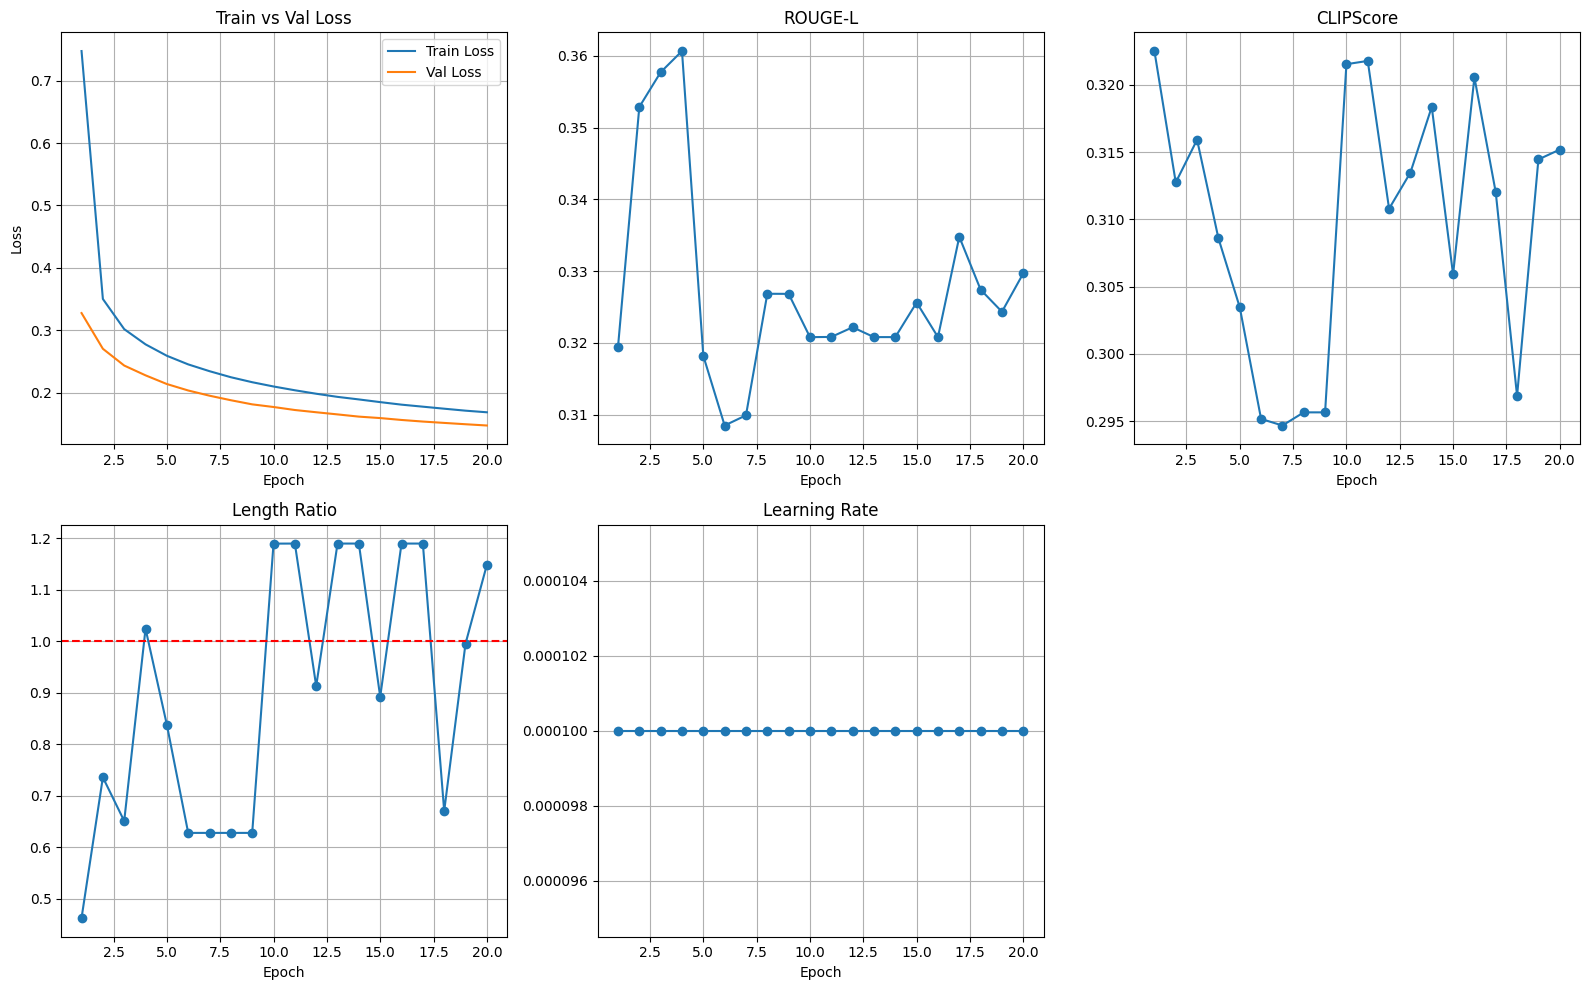

In [41]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(history["train_loss"]) + 1)

plt.figure(figsize=(16, 10))

# 1) Train vs Val Loss
plt.subplot(2, 3, 1)
plt.plot(epochs, history["train_loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.title("Train vs Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# 2) ROUGE-L
plt.subplot(2, 3, 2)
plt.plot(epochs, history["rouge_l"], marker="o")
plt.title("ROUGE-L")
plt.xlabel("Epoch")
plt.grid(True)

# 3) CLIPScore
plt.subplot(2, 3, 3)
plt.plot(epochs, history["clipscore"], marker="o")
plt.title("CLIPScore")
plt.xlabel("Epoch")
plt.grid(True)

# 4) Length Ratio
plt.subplot(2, 3, 4)
plt.plot(epochs, history["len_ratio"], marker="o")
plt.axhline(1.0, color="red", linestyle="--")
plt.title("Length Ratio")
plt.xlabel("Epoch")
plt.grid(True)

# 5) Learning Rate
plt.subplot(2, 3, 5)
plt.plot(epochs, history["lr"], marker="o")
plt.title("Learning Rate")
plt.xlabel("Epoch")
plt.grid(True)

plt.tight_layout()
plt.show()


# Testing Models

Best model loaded and ready for inference.


Evaluating Test Set: 100%|██████████| 93/93 [01:28<00:00,  1.06it/s]



=== Test Set Metrics ===
ROUGE-L:    0.3320
CLIPScore:  0.3132
Len Ratio:  1.2378

=== Showing 5 Test Samples ===



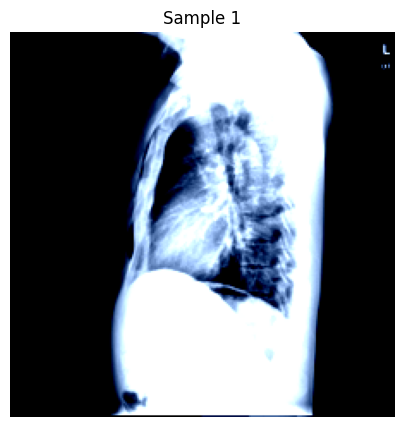

=== True Report ===
Projection: Lateral. No active disease.

=== Generated Report ===
Projection: Lateral. The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings. No acute cardiopulmonary findings.

--------------------------------------------------------------------------------


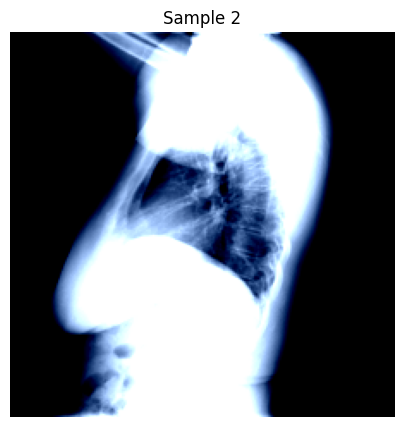

=== True Report ===
Projection: Lateral. The lungs and pleural spaces show no acute abnormality. Heart size and pulmonary vascularity within normal limits. 1. No acute pulmonary abnormality.

=== Generated Report ===
Projection: Lateral. The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings. No acute cardiopulmonary findings.

--------------------------------------------------------------------------------


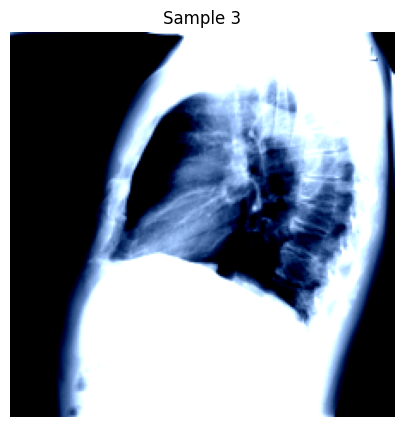

=== True Report ===
Projection: Lateral. Lungs are overall hyperexpanded with flattening of the diaphragms. Lungs are clear without focal airspace disease. No pleural effusions or pneumothoraces. Heart and mediastinum of normal size and contour. degenerative changes within the spine. There are expansile changes within the right clavicle which were seen on the previous XXXX/CT. Findings are consistent with changes of multiple myeloma. Clear lungs.

=== Generated Report ===
Projection: Lateral. The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings. No acute cardiopulmonary findings.

--------------------------------------------------------------------------------


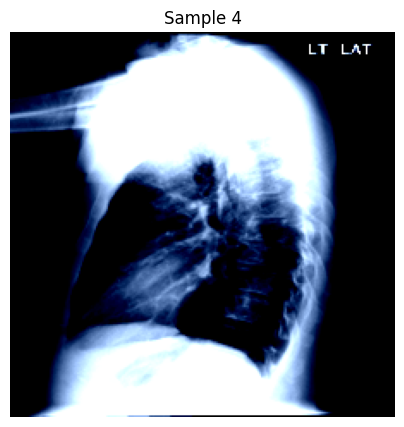

=== True Report ===
Projection: Lateral. The heart is normal in size. The aorta is tortuous and ectatic. The lungs are clear without focal airspace opacity, pleural effusion, or pneumothorax. The osseous structures are intact. No acute cardiopulmonary findings.

=== Generated Report ===
Projection: Lateral. The cardiomediastinal silhouette and pulmonary vasculature are within normal limits in size. The lungs are clear of focal airspace disease, pneumothorax, or pleural effusion. There are no acute bony findings. No acute cardiopulmonary findings.

--------------------------------------------------------------------------------


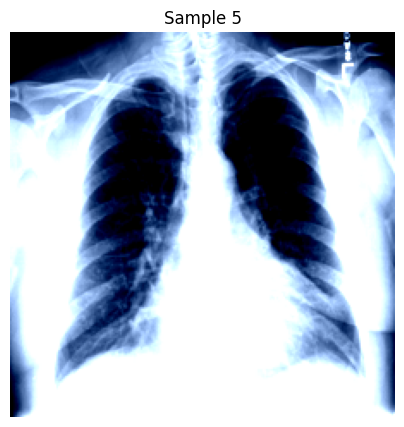

=== True Report ===
Projection: Frontal. Stable cardiomegaly with vascular prominence without overt edema. No focal airspace disease. No large pleural effusion or pneumothorax. The XXXX are intact. Stable cardiomegaly without overt pulmonary edema.

=== Generated Report ===
Projection: Frontal. The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acute abnormality. No acute cardiopulmonary abnormality.

--------------------------------------------------------------------------------


In [42]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# 1) تحميل أفضل نموذج تم حفظه أثناء التدريب
# ---------------------------------------------------------
model.load_state_dict(torch.load(best_model_path, map_location=device))
model.to(device)
model.eval()

print("Best model loaded and ready for inference.")


# ---------------------------------------------------------
# 2) دالة inference لتوليد تقرير لصورة واحدة
# ---------------------------------------------------------
def generate_report_for_image(model, image_tensor):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.unsqueeze(0).to(device)
        generated = model.generate_reports(image_tensor, max_length=100)
        return generated[0]


# ---------------------------------------------------------
# 3) دالة حساب المعايير على بيانات الاختبار كاملة
# ---------------------------------------------------------
def evaluate_test_set(model, dataloader):
    model.eval()
    refs, preds = [], []
    all_images = []

    progress = tqdm(dataloader, desc="Evaluating Test Set")

    with torch.no_grad():
        for images, reports in progress:
            images = images.to(device)

            # توليد تقارير
            generated = model.generate_reports(images, max_length=100)

            refs.extend(list(reports))
            preds.extend(generated)
            all_images.append(images)

    all_images = torch.cat(all_images, dim=0)

    # حساب المعايير
    rouge_l   = compute_rouge_l(refs, preds)
    clipscore = compute_clipscore(all_images, preds)
    len_ratio = compute_length_ratio(refs, preds)

    return {
        "rouge_l": rouge_l,
        "clipscore": clipscore,
        "len_ratio": len_ratio
    }


# ---------------------------------------------------------
# 4) تنفيذ التقييم على بيانات الاختبار (قبل عرض أي صور)
# ---------------------------------------------------------
test_metrics = evaluate_test_set(model, test_loader)

print("\n=== Test Set Metrics ===")
print(f"ROUGE-L:    {test_metrics['rouge_l']:.4f}")
print(f"CLIPScore:  {test_metrics['clipscore']:.4f}")
print(f"Len Ratio:  {test_metrics['len_ratio']:.4f}")


# ---------------------------------------------------------
# 5) بعد الانتهاء من التقييم: عرض 5 عينات من بيانات الاختبار
# ---------------------------------------------------------
samples_to_show = 5
shown = 0

print("\n=== Showing 5 Test Samples ===\n")

for images, reports in test_loader:
    for i in range(len(images)):
        if shown >= samples_to_show:
            break

        img = images[i]
        true_report = reports[i]
        pred_report = generate_report_for_image(model, img)

        # عرض الصورة
        plt.figure(figsize=(5,5))
        plt.imshow(img.permute(1,2,0).cpu().numpy(), cmap='gray')
        plt.axis("off")
        plt.title(f"Sample {shown+1}")
        plt.show()

        print(f"=== True Report ===\n{true_report}\n")
        print(f"=== Generated Report ===\n{pred_report}\n")
        print("-"*80)

        shown += 1

    if shown >= samples_to_show:
        break


<div dir="rtl">

## **التقرير الحقيقي**
الإسقاط: أمامي. تضخم قلب مستقر مع بروز وعائي دون وذمة رئوية واضحة.  
لا يوجد مرض في المساحات الهوائية. لا يوجد انصباب جنبي كبير أو استرواح صدري.  
العظام سليمة. تضخم القلب مستقر دون وذمة رئوية واضحة.

---

## **التقرير الذي ولّده النموذج**
الإسقاط: أمامي. الرئتان صافيتان على الجانبين. لا يوجد دليل على تكثف بؤري أو استرواح صدري أو انصباب جنبي.  
ظل المنصف القلبي طبيعي.  
البنى العظمية المرئية في الصدر دون أي شذوذ حاد.  
لا توجد علامات على مشكلة قلبية أو رئوية حادة.

</div>


**التقرير الحقيقي:**

| البند       | الوصف         |
|-------------|---------------|
| **الإسقاط (Projection)** | جانبي (Lateral) |
| **النتيجة**               | لا يوجد مرض نشط. |

---

**التقرير المُنشأ:**

| المنطقة/العضو              | الوصف / النتيجة                                                                                              |
|----------------------------|--------------------------------------------------------------------------------------------------------------|
| **الإسقاط (Projection)**   | جانبي (Lateral)                                                                                              |
| **الظل القلبي الوسطي**     | ضمن الحدود الطبيعية.                                                                                         |
| **الأوعية الدموية الرئوية** | ضمن الحدود الطبيعية في الحجم.                                                                                |
| **الرئتان**                | **خاليتان من:** <br> • مرض رئوي بؤري (فocal airspace disease). <br> • استرواح الصدر (pneumothorax). <br> • انصباب جنبي (pleural effusion). |
| **الهيكل العظمي**          | لا توجد نتائج حادة (مثل كسور).                                                                                |
| **الخلاصة العامة**         | **لا توجد نتائج حادة قلبية رئوية.**                                                                           |

# Project in Real-Time

In [43]:
# import torch
# import torch.nn as nn
# from PIL import Image
# import torchvision.transforms as T
# from transformers import T5Tokenizer, T5ForConditionalGeneration
# import timm

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # ---------------------------------------------------------
# # 1) تعريف الـ Encoder (CoAtNet)
# # ---------------------------------------------------------
# class CoAtNetEncoder(nn.Module):
#     def __init__(self, model_name="coatnet_1_rw_224"):
#         super().__init__()
#         self.encoder = timm.create_model(
#             model_name,
#             pretrained=False,
#             num_classes=0,
#             global_pool="avg"
#         )

#     def forward(self, x):
#         return self.encoder(x)


# # ---------------------------------------------------------
# # 2) تعريف النموذج الكامل (Vision → Language)
# # ---------------------------------------------------------
# class VisionLanguageModel(nn.Module):
#     def __init__(self, encoder_name="coatnet_1_rw_224"):
#         super().__init__()
#         self.encoder = CoAtNetEncoder(encoder_name)
#         self.t5 = T5ForConditionalGeneration.from_pretrained("t5-small")

#         # تحويل أبعاد CoAtNet إلى أبعاد T5 (512)
#         self.proj = nn.Linear(self.encoder.encoder.num_features, 512)

#     def forward(self, pixel_values, input_ids, attention_mask, labels=None):
#         img_emb = self.encoder(pixel_values)
#         img_emb = self.proj(img_emb).unsqueeze(1)

#         outputs = self.t5(
#             inputs_embeds=img_emb,
#             decoder_input_ids=input_ids,
#             attention_mask=attention_mask,
#             labels=labels
#         )
#         return outputs

#     def generate_report(self, pixel_values, max_length=100):
#         img_emb = self.encoder(pixel_values)
#         img_emb = self.proj(img_emb).unsqueeze(1)

#         generated_ids = self.t5.generate(
#             inputs_embeds=img_emb,
#             max_length=max_length,
#             num_beams=4,
#             early_stopping=True
#         )
#         return tokenizer.decode(generated_ids[0], skip_special_tokens=True)


# # ---------------------------------------------------------
# # 3) تحميل النموذج المحفوظ
# # ---------------------------------------------------------
# tokenizer = T5Tokenizer.from_pretrained("t5-small")

# model = VisionLanguageModel()
# model.load_state_dict(torch.load("best_model.pt", map_location=device))
# model.to(device)
# model.eval()

# print("Model loaded successfully.")


# # ---------------------------------------------------------
# # 4) دالة لتحويل الصورة (نفس الـ transforms أثناء التدريب)
# # ---------------------------------------------------------
# transform = T.Compose([
#     T.Resize((224, 224)),
#     T.ToTensor(),
#     T.Normalize(mean=[0.5], std=[0.5])
# ])


# # ---------------------------------------------------------
# # 5) رفع صورة من جهازك
# # ---------------------------------------------------------

# uploaded = files.upload()
# img_path = list(uploaded.keys())[0]

# img = Image.open(img_path).convert("RGB")
# img_tensor = transform(img).unsqueeze(0).to(device)


# # ---------------------------------------------------------
# # 6) توليد التقرير الطبي
# # ---------------------------------------------------------
# with torch.no_grad():
#     report = model.generate_report(img_tensor)

# print("\n=== Generated Medical Report ===\n")
# print(report)
